# Bio-Signal Based Smoking Classification Using ML
# Problem Statement
You are working as a data scientist in a global
company. Over the years, the company has
collected details and gathered a lot of
information about individuals. The
management wants to build an intelligent
system from the data to determine the
presence or absence of smoking in a person
through bio-signals. Given a person’s
information, build a machine learning model
that can classify the presence or absence of
smoking.

## Objective
To build a machine learning model that predicts whether a person is a smoker based on biological health signals.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Information

This dataset is a collection of basic health biological signal data which
contains around 55K record with 27 attributes.

### Dataset Link: https://drive.google.com/file/d/1-2EFxY4u_lUaGNgsstEFAjT01mwOS4h5/view?usp=sharing

### Attribute Descriptions

| Attribute              | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `ID`                   | Unique identifier for each individual (not useful for prediction)           |
| `gender`               | Gender of the individual: `M` (Male) or `F` (Female)                        |
| `age`                  | Age group of the person (in 5-year intervals)                                |
| `height(cm)`           | Height of the person in centimeters                                          |
| `weight(kg)`           | Weight of the person in kilograms                                            |
| `waist(cm)`            | Waist circumference in centimeters                                           |
| `eyesight(left)`       | Vision measurement for the left eye                                          |
| `eyesight(right)`      | Vision measurement for the right eye                                         |
| `hearing(left)`        | Hearing ability in the left ear (likely binary)                              |
| `hearing(right)`       | Hearing ability in the right ear (likely binary)                             |
| `systolic`             | Systolic blood pressure (upper value)                                        |
| `relaxation`           | Diastolic blood pressure (lower value, also called "relaxation")            |
| `fasting blood sugar`  | Blood sugar level after fasting                                              |
| `Cholesterol`          | Total cholesterol level                                                      |
| `triglyceride`         | Triglyceride level (type of fat in the blood)                                |
| `HDL`                  | High-Density Lipoprotein cholesterol (good cholesterol)                      |
| `LDL`                  | Low-Density Lipoprotein cholesterol (bad cholesterol)                        |
| `hemoglobin`           | Hemoglobin level (oxygen-carrying protein in red blood cells)               |
| `Urine protein`        | Protein content in urine (indicator of kidney function or disease)           |
| `serum creatinine`     | Creatinine in blood (indicator of kidney function)                           |
| `AST`                  | Aspartate transaminase enzyme level (liver function marker)                  |
| `ALT`                  | Alanine transaminase enzyme level (liver function marker)                    |
| `Gtp`                  | Gamma-glutamyl transpeptidase level (linked to liver health)                 |
| `oral`                 | Oral examination status (categorical)                                       |
| `dental caries`        | Indicator of tooth decay (0 or 1)                                            |
| `tartar`               | Indicator of tartar presence on teeth (0 or 1)                               |
| `smoking`              | Target variable: 1 for smoker, 0 for non-smoker                              |


# Step 1: Importing Required Libraries


In [2]:
# Basic data handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


Explanation:

- pandas, numpy: For data manipulation and numerical computations.

- seaborn, matplotlib: For data visualization.

- scikit-learn: Used for model building, preprocessing, and evaluation.

# Step 2: Load the Dataset


In [3]:
# Load the dataset from CSV file
df = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/Bio Signal Analysis/smoking.csv")

# Display first few records to understand the structure
df.head()


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


We're loading the dataset and printing the first few rows to get an overview.

# Step 3: Basic Dataset Exploration


In [6]:
# Display the shape (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (55692, 27)


In [5]:
# Display column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [7]:
# Get statistical summary of numerical columns
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


Explanation:

- df.shape gives the number of rows and columns.

- df.info() shows types of data and any missing values.

- df.describe() helps identify value distributions and outliers.

# Step 4: Drop Irrelevant Columns

In [11]:
df = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/Bio Signal Analysis/smoking.csv")

# Drop the ID column as it's just an index
df.drop(columns=['ID'], inplace=True)

# The ID column is not useful for prediction, so we remove it.

In [12]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


# Step 5: Check and Handle Missing Values


In [13]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values in each column:\n", missing)


Missing values in each column:
 gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


This identifies if any values are missing. We’ll decide whether to fill or drop based on results (none are missing in this dataset).

# Step 6: Exploratory Data Analysis (EDA)

6.1 Gender vs Smoking

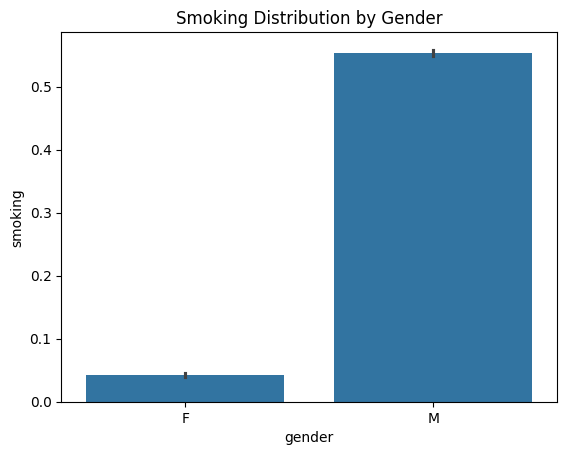

In [15]:
sns.barplot(data=df, x='gender', y='smoking')
plt.title("Smoking Distribution by Gender")
plt.show()

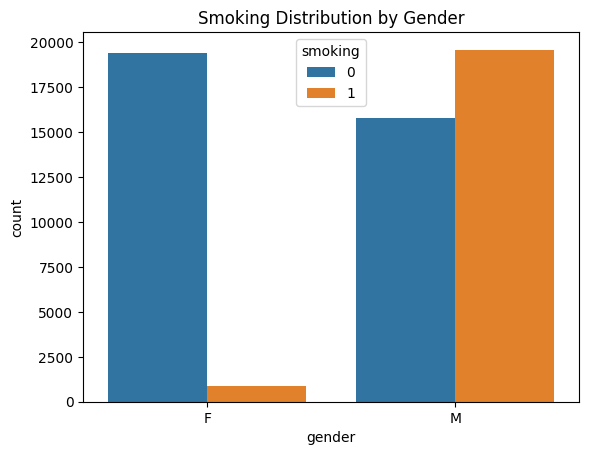

In [14]:
sns.countplot(data=df, x='gender', hue='smoking')
plt.title("Smoking Distribution by Gender")
plt.show()


- Visualizes how smoking behavior differs between males and females.

- We can clearly see from the below graph that most smokers are men.

6.2 Smoking Percentage


In [16]:
smoke_percent = df['smoking'].value_counts(normalize=True) * 100
print("Smoking percentage:\n", smoke_percent)

#Calculates and prints the percentage of smokers vs non-smokers.

Smoking percentage:
 smoking
0    63.271206
1    36.728794
Name: proportion, dtype: float64


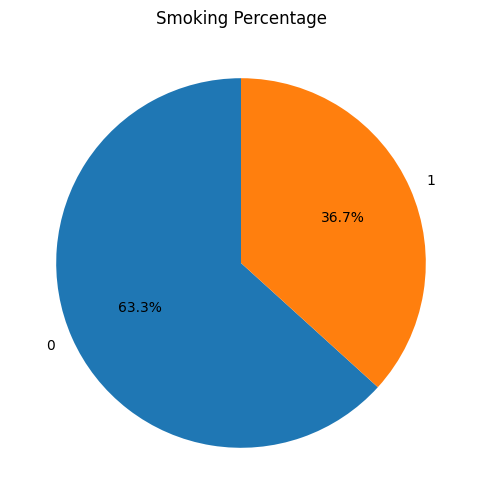

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(smoke_percent, labels=smoke_percent.index, autopct='%1.1f%%', startangle=90)
plt.title("Smoking Percentage")
plt.show()

There are 36.73 percent of the people who are smoking ciggarette.

6.3 Age vs Smoking


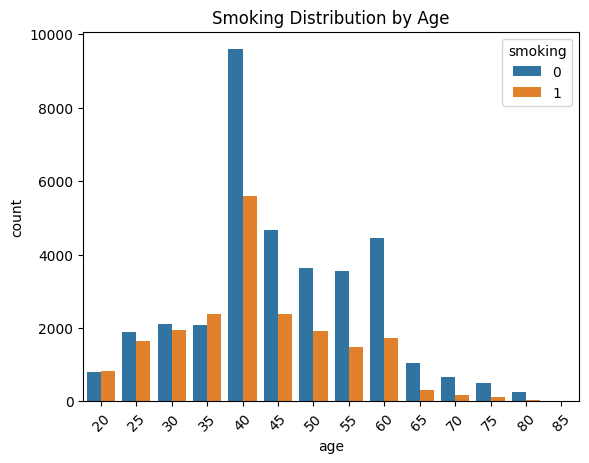

In [18]:
sns.countplot(data=df, x='age', hue='smoking')
plt.title("Smoking Distribution by Age")
plt.xticks(rotation=45)
plt.show()

# Identifies age groups with higher smoking rates.


Most number of smokers are having the age 40

6.4 Outlier Detection (Boxplots)


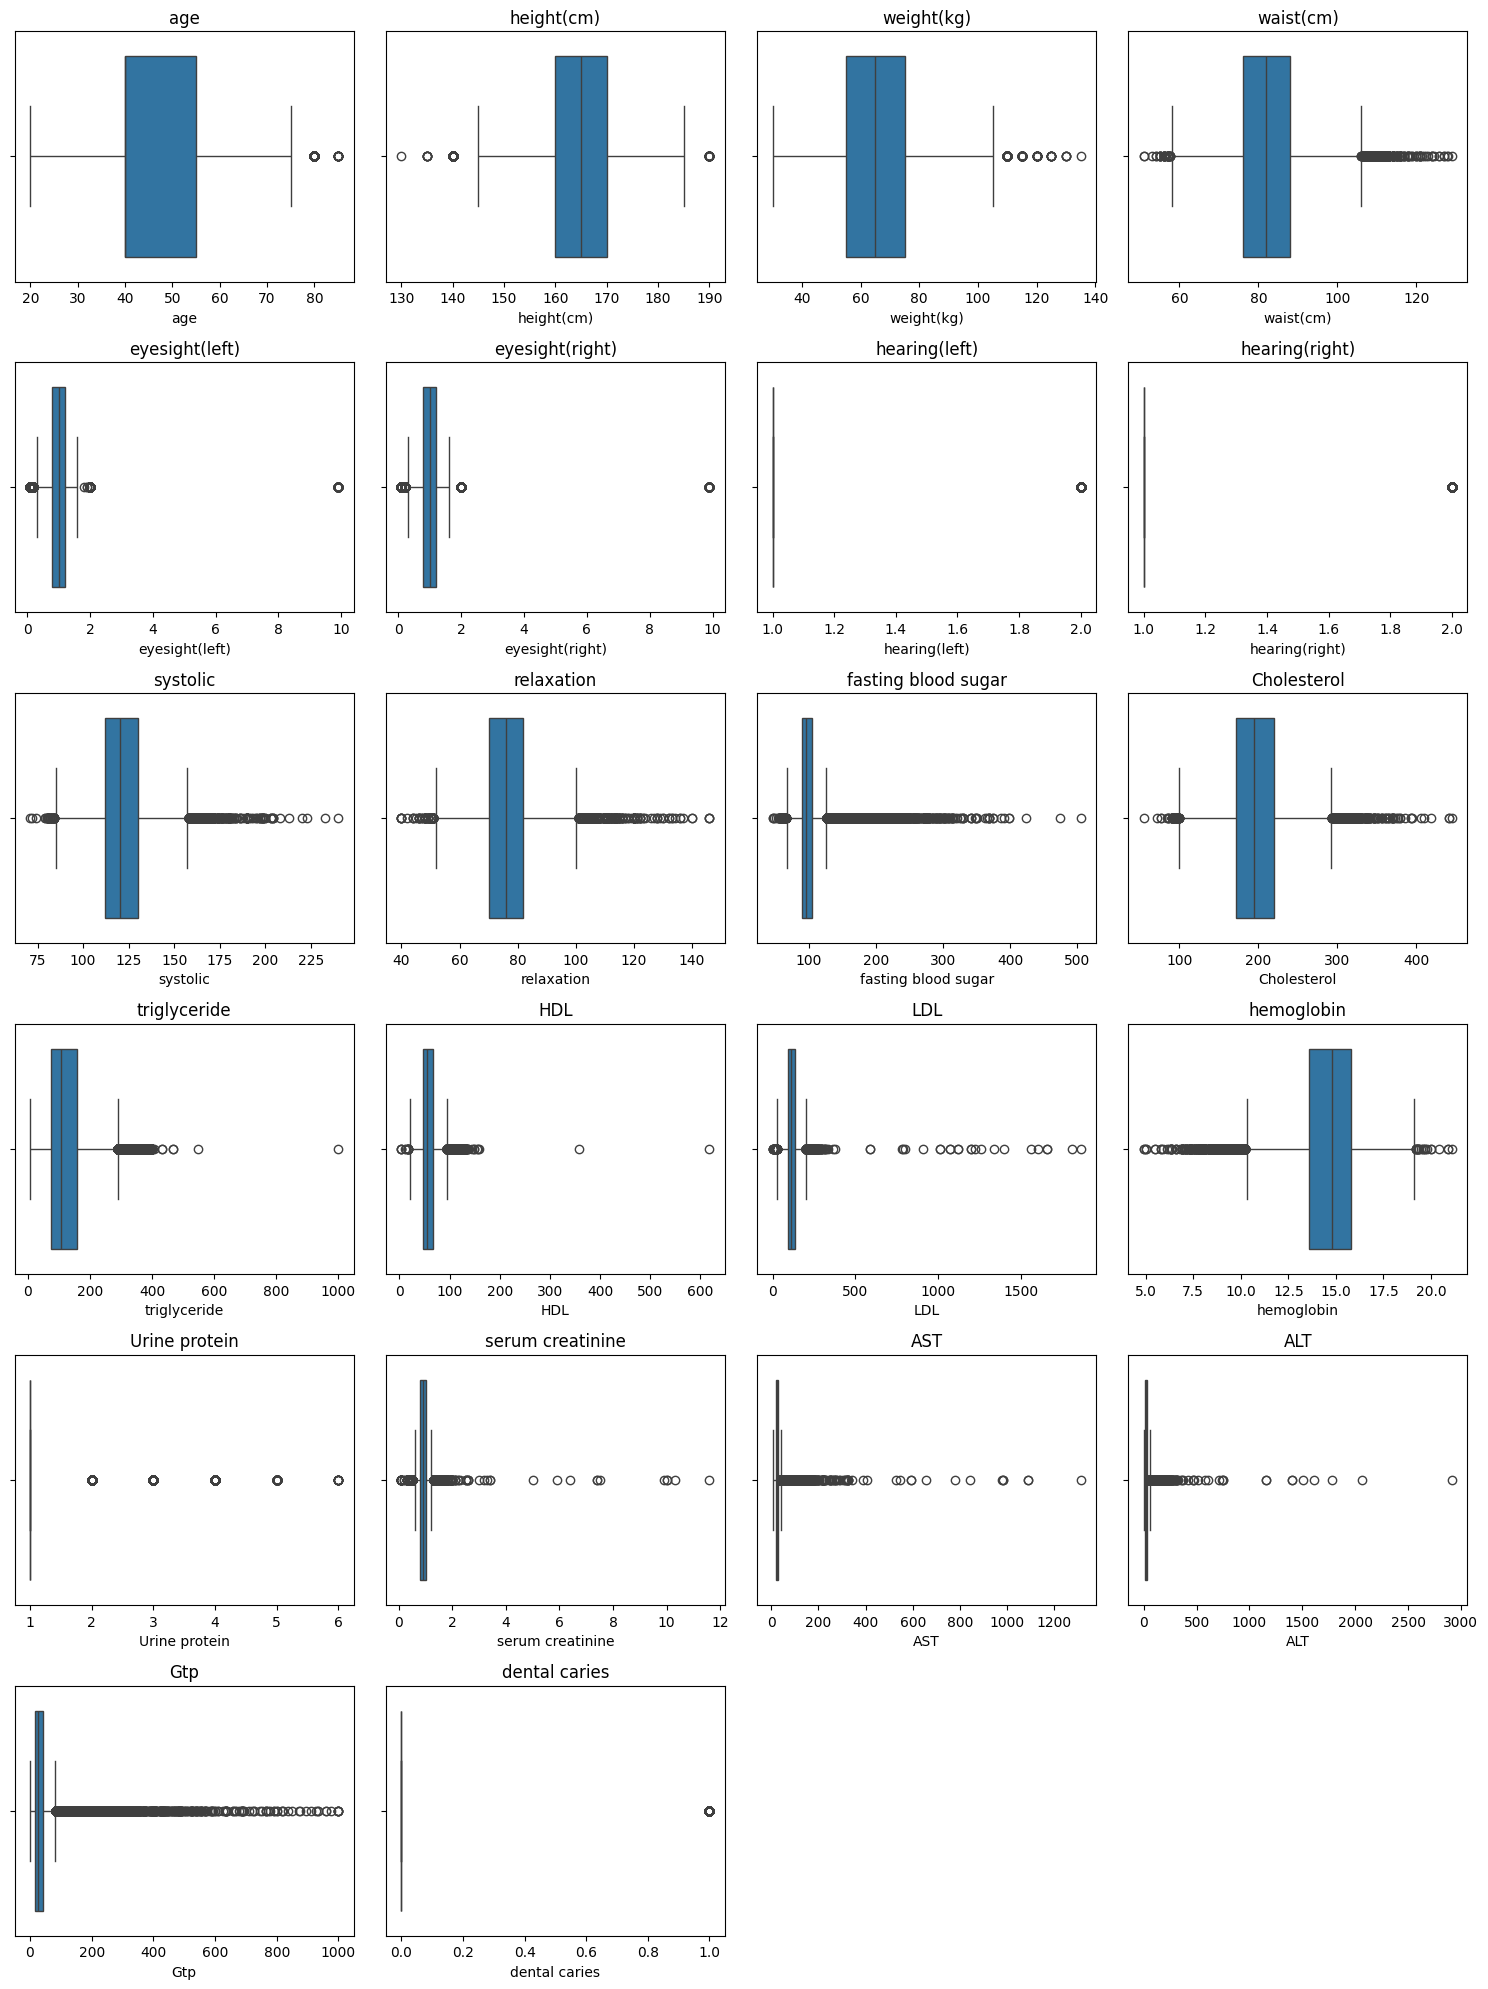

In [19]:
# Get all numerical feature names except 'smoking'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('smoking')

# Plot boxplots for all numeric features
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


- Representation of columns using boxplot to detect outliers.
- Here outliers represent natural
variations in the population, and they should be left as is in the dataset.

- These are called true
outliers. Therefore for this dataset we will not remove outliers.

Boxplots show outliers, which we won’t remove since they are meaningful in health data.

# Step 7: One-Hot Encoding for Categorical Variables

In [20]:
# Data cleaning

# Convert 'gender' into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['gender'], drop_first=True)


gender is categorical, so we encode it. drop_first=True avoids multicollinearity.

# Step 8: Feature Selection using Feature Importance

In [22]:
# Convert 'Y'/'N' to 1/0
# Before fitting the model, apply this transformation:

# Convert 'Y' and 'N' to 1 and 0 in all object-type columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace({'Y': 1, 'N': 0})


Explanation:

This loop goes through all categorical string columns.

It replaces 'Y' with 1 and 'N' with 0.

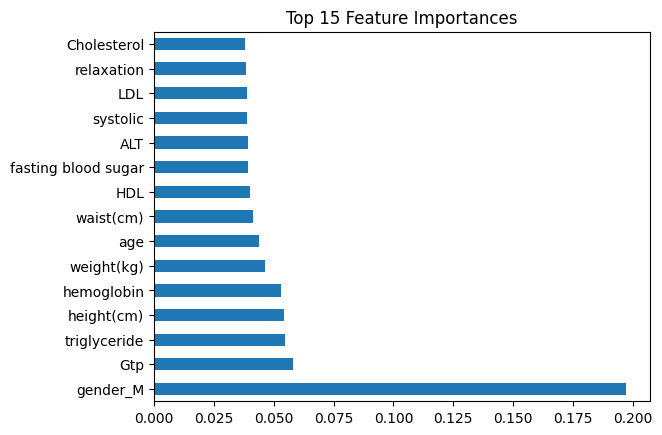

In [23]:
# Split data into features and target
X = df.drop('smoking', axis=1)
y = df['smoking']

# Use ExtraTreesClassifier to get feature importances
model = ExtraTreesClassifier()
model.fit(X, y)

# Select top 15 important features
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.nlargest(15)

# Plot the top features
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.show()

# Keep only the top 15 features
X = X[top_features.index]


- Feature importance is a technique
that calculate a score for all the
input features for a given model.
- So, out of 24 features we will select the
top 15 features based on the score.
- This reduces the dimensionality and keeps only the most important predictors for smoking.

# Step 9: Data Splitting and Scaling


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Splits the data and applies feature scaling to improve model performance.

# Step 10: Model Training and Evaluation
10.1 Logistic Regression

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calculating accuracy and generating the classification report of Logistic Regression

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.730676003231888
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      7027
           1       0.62      0.69      0.65      4112

    accuracy                           0.73     11139
   macro avg       0.71      0.72      0.72     11139
weighted avg       0.74      0.73      0.73     11139



10.2 Decision Tree


In [26]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7867851692252447
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7027
           1       0.71      0.71      0.71      4112

    accuracy                           0.79     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.79      0.79      0.79     11139



10.3 Bagging Classifier (Bagging Algorithm)

Bootstrap Aggregation or bagging involves taking multiple samples from the training dataset
(with replacement) and training a model for each sample.

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Correct usage for newer versions of scikit-learn (v1.2+)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)


In [30]:

bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))


Bagging Accuracy: 0.8263757967501572
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.75      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



10.4 Random Forest


In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8249394021007271
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.75      0.78      0.77      4112

    accuracy                           0.82     11139
   macro avg       0.81      0.82      0.81     11139
weighted avg       0.83      0.82      0.83     11139



10.5 Extra Trees

In [32]:
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))


Extra Trees Accuracy: 0.8235030074512972
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7027
           1       0.74      0.80      0.77      4112

    accuracy                           0.82     11139
   macro avg       0.81      0.82      0.81     11139
weighted avg       0.83      0.82      0.82     11139



- Each model is trained and evaluated for performance.
- We use accuracy and classification reports (precision, recall, f1-score).

# Step 11: Model Comparison Summary


In [33]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Bagging', 'Random Forest', 'Extra Trees'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_bag),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_et)
    ]
})

# Display sorted results
results.sort_values(by='Accuracy', ascending=False)

# Helps compare models and choose the best-performing one.


,Model,Accuracy
2,Bagging,0.826376
3,Random Forest,0.824939
4,Extra Trees,0.823503
1,Decision Tree,0.786785
0,Logistic Regression,0.730676




### **Model Performance Comparison**

We evaluated five different machine learning models on the bio-signal dataset to classify individuals as smokers or non-smokers. Below is the summary of performance based on **accuracy**, **precision**, **recall**, and **F1-score**:

| Model                 | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|----------------------|----------|----------------------|------------------|--------------------|
| Logistic Regression  | 0.7307   | 0.62                 | 0.69             | 0.65               |
| Decision Tree        | 0.7868   | 0.71                 | 0.71             | 0.71               |
| Bagging Classifier   | **0.8264** | **0.75**              | **0.79**          | **0.77**            |
| Random Forest        | 0.8249   | 0.75                 | 0.78             | 0.77               |
| Extra Trees          | 0.8235   | 0.74                 | 0.80             | 0.77               |

> Class 1 refers to the **smoker** class (the positive class in this classification problem).

---

### **Interpretation:**

- **Logistic Regression** had the lowest performance, which is expected since it’s a linear model and may not capture complex patterns in the data.
- **Decision Tree** improved performance significantly by modeling non-linear relationships.
- **Ensemble Methods (Bagging, Random Forest, Extra Trees)** showed the **best performance**, with **Bagging Classifier achieving the highest overall accuracy (82.64%)**.
- **Precision and Recall for the smoker class (1)** improved considerably in ensemble models, which is crucial for real-world health applications to reduce false negatives (i.e., missing actual smokers).




#  **Conclusion:**

- We successfully built multiple classification models to predict smoking habits based on bio-signal data.
- The dataset, containing 27 health-related features, was cleaned, visualized, and analyzed. Feature importance was used to reduce dimensionality to the top 15 features.
- Ensemble techniques significantly improved classification performance compared to individual models.
- **Bagging Classifier** provided the best balance of accuracy, recall, and F1-score for the smoker class, making it the **recommended model for deployment**.



### **Next Steps / Recommendations:**

- **Hyperparameter Tuning:** Use `GridSearchCV` or `RandomizedSearchCV` to further optimize ensemble models.
- **Cross-Validation:** Add k-fold cross-validation to verify model generalization.
- **Model Interpretability:** Use SHAP or LIME to explain individual predictions.
- **Deployment:** The final model can be deployed using Flask, FastAPI, or Streamlit for real-time prediction use.



# Step 12: Save the Best Model (Bagging Classifier)
Use Python’s joblib or pickle to save the trained model. joblib is recommended for large models.

In [34]:
import joblib

# Save the trained Bagging model
joblib.dump(bag, 'bagging_model.pkl')

# Save the scaler used during preprocessing (optional but important for inference)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [38]:
#Reload the Model for Inference Later

# Load the model and scaler back
loaded_model = joblib.load('bagging_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example: Make prediction on new data
# (Assume `new_data` is a DataFrame with same columns as training input)

import pandas as pd

# Feature order must match top 15 selected during training
import pandas as pd

# Input features in exact order used during training
new_data = pd.DataFrame([{
    'gender_M': 1,                # 1 for Male, 0 for Female
    'Gtp': 40.0,
    'triglyceride': 145.0,
    'height(cm)': 172.0,
    'hemoglobin': 14.8,
    'weight(kg)': 72.0,
    'age': 40,
    'waist(cm)': 85.0,
    'HDL': 52.0,
    'fasting blood sugar': 95.0,
    'ALT': 30.0,
    'systolic': 120.0,
    'LDL': 110.0,
    'relaxation': 80.0,
    'Cholesterol': 180.0
}])


# Step 1: Scale it
new_data_scaled = loaded_scaler.transform(new_data)

# Step 2: Predict
predicted_class = loaded_model.predict(new_data_scaled)

# Output result
print("Prediction:", "Smoker" if predicted_class[0] == 1 else "Non-Smoker")


Prediction: Non-Smoker


In [36]:
print(X.columns.tolist())


['gender_M', 'Gtp', 'triglyceride', 'height(cm)', 'hemoglobin', 'weight(kg)', 'age', 'waist(cm)', 'HDL', 'fasting blood sugar', 'ALT', 'systolic', 'LDL', 'relaxation', 'Cholesterol']


# Gradio App to Load and Use Bagging Classifier
1. Make sure we've already saved your model and scaler:


```
# This is formatted as code
import joblib

# Save trained model and scaler
joblib.dump(bag, 'bagging_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

```

2. Now create the Gradio App
python
Copy
Edit



In [39]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00


In [41]:
import gradio as gr
import joblib
import pandas as pd

# Load the saved model and scaler
model = joblib.load('bagging_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define the 15 input feature names used in training
feature_names = [
    'gender_M', 'Gtp', 'triglyceride', 'height(cm)', 'hemoglobin',
    'weight(kg)', 'age', 'waist(cm)', 'HDL', 'fasting blood sugar',
    'ALT', 'systolic', 'LDL', 'relaxation', 'Cholesterol'

]

# Define the prediction function
def predict_smoking(*inputs):
    # Convert input to DataFrame
    input_df = pd.DataFrame([inputs], columns=feature_names)

    # Scale the input
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)[0]

    # Interpret prediction
    return "Smoker" if prediction == 1 else "Non-Smoker"

# Define the interface
inputs = [gr.Number(label=feature) for feature in feature_names]

gr.Interface(
    fn=predict_smoking,
    inputs=inputs,
    outputs="text",
    title="Bio-Signal Smoking Classifier",
    description="Enter the health parameters to predict whether a person is a smoker or not based on bio-signals."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d4e0349457fce6045b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
